## **D3TOP - Tópicos em Ciência de Dados (IFSP Campinas)**
**Prof. Dr. Samuel Martins (@iamsamucoding @samucoding @xavecoding)** <br/>
xavecoding: https://youtube.com/c/xavecoding <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

<hr/>

# Genre Identification by Text Classification

## Sprint 2

We will start solving a **Text Classification** problem. We will train a model to predict movies' genres throught their descriptions <br/>

In this notebook, we will:
- Perform _text preprocessing_
- Run the previous experiments again

## 1. Get the Dataset
https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./datasets/genre_classification_train.csv', sep=';')
df_test = pd.read_csv('./datasets/genre_classification_test.csv', sep=';')

In [3]:
df_train

,id,title,genre,description,label
0,27180,Rivals (1972),drama,"Scott Jacoby, as a boy with an unhealthy and p...",8
1,19975,Kosava (1974),drama,The story of two workers who returned from abr...,8
2,48284,In Winter (2017),drama,In Winter is an independent feature emerging f...,8
3,37540,Maria Chapdelaine (1950),drama,"At the beginning of the 20th century, in the N...",8
4,43389,The Gift Of (2018),comedy,A delicious combo of romantic-comedy and socia...,5
...,...,...,...,...,...
43366,40649,Mesto nic neví (1976),crime,A summer's day. Sixteen-year-old Hedvika arriv...,6
43367,50892,Join the Cult (2015),documentary,"Join The Cult follows Cult Of Tomorrows End, a...",7
43368,28767,Hancock's Half Hour: The New Neighbour (2016),comedy,Whilst claiming all his neighbours are voyeurs...,5
43369,37822,New Project 'Zengin Sinifin Dizi Dibinde' (2013),drama,"Spring of 2013, Istanbul in the midst of youth...",8


In [4]:
df_test

,id,title,genre,description,label
0,14679,Undesignated Driver (1996),short,"This video series, in national distribution wi...",21
1,8348,Proteolysis (????),action,"""Proteolysis"" is a gritty, action-adventure, s...",0
2,34987,Intimately Yours (1998),adventure,Love bondager Chelsea Pfeiffer ties and gags o...,2
3,15885,49 Days (????),horror,"Jason and Camille, sweethearts since childhood...",13
4,42009,The Torturer (2005),horror,The twenty-four year-old aspirant actress Gine...,13
...,...,...,...,...,...
10838,47207,Uso Justo (2005),short,When an experimental filmmaker decides to shoo...,21
10839,53454,The Perfect Girl (2015),romance,A young boy (Jay) and a girl (Vedika) happen t...,19
10840,21050,"""Trapped Minds"" (2016)",drama,Trapped Minds is a 4-episode psychological thr...,8
10841,44343,Chronicles of a Silver Revolver (????),short,With today's issue with gun violence and contr...,21


## 2. Text Preprocessing
- lowering
- expand contractions
- remove:
  + punctuations
  + stop words
  + urls
  + emails
  + numbers
  + emojis
  + phone numbers
  + multiple whitespaces
  + currency symbols
  + special characters

In [5]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    
    return text

In [6]:
# progress bar in pandas
!pip install tqdm

In [7]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [8]:
# pre-process the training set
df_train['description-pre'] = df_train['description'].progress_apply(lambda text: text_preprocessing(text))

100%|██████████| 43371/43371 [00:07<00:00, 5624.16it/s]


In [9]:
df_train.head()

,id,title,genre,description,label,description-pre
0,27180,Rivals (1972),drama,"Scott Jacoby, as a boy with an unhealthy and p...",8,scott jacoby boy unhealthy pathological attach...
1,19975,Kosava (1974),drama,The story of two workers who returned from abr...,8,story workers returned abroad wants find good ...
2,48284,In Winter (2017),drama,In Winter is an independent feature emerging f...,8,winter independent feature emerging classical ...
3,37540,Maria Chapdelaine (1950),drama,"At the beginning of the 20th century, in the N...",8,beginning th century north province quebec yea...
4,43389,The Gift Of (2018),comedy,A delicious combo of romantic-comedy and socia...,5,delicious combo romanticcomedy social satire f...


In [10]:
# pre-process the training set
df_test['description-pre'] = df_test['description'].progress_apply(lambda text: text_preprocessing(text))

100%|██████████| 10843/10843 [00:01<00:00, 5541.70it/s]


In [11]:
df_test.head()

,id,title,genre,description,label,description-pre
0,14679,Undesignated Driver (1996),short,"This video series, in national distribution wi...",21,video series national distribution film ideas ...
1,8348,Proteolysis (????),action,"""Proteolysis"" is a gritty, action-adventure, s...",0,proteolysis gritty actionadventure set rural m...
2,34987,Intimately Yours (1998),adventure,Love bondager Chelsea Pfeiffer ties and gags o...,2,love bondager chelsea pfeiffer ties gags harmo...
3,15885,49 Days (????),horror,"Jason and Camille, sweethearts since childhood...",13,jason camille sweethearts childhood swimming n...
4,42009,The Torturer (2005),horror,The twenty-four year-old aspirant actress Gine...,13,twentyfour yearold aspirant actress ginette ca...


In [12]:
# save the preprocessed datasets
df_train.to_csv('./datasets/genre_classification_train_preprocessed.csv', sep=';', index=False)
df_test.to_csv('./datasets/genre_classification_test_preprocessed.csv', sep=';', index=False)

## 2. Word Cloud for Train Set

In [13]:
# classes/genres
genres = sorted(df_train['genre'].unique())
print(genres)

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western']


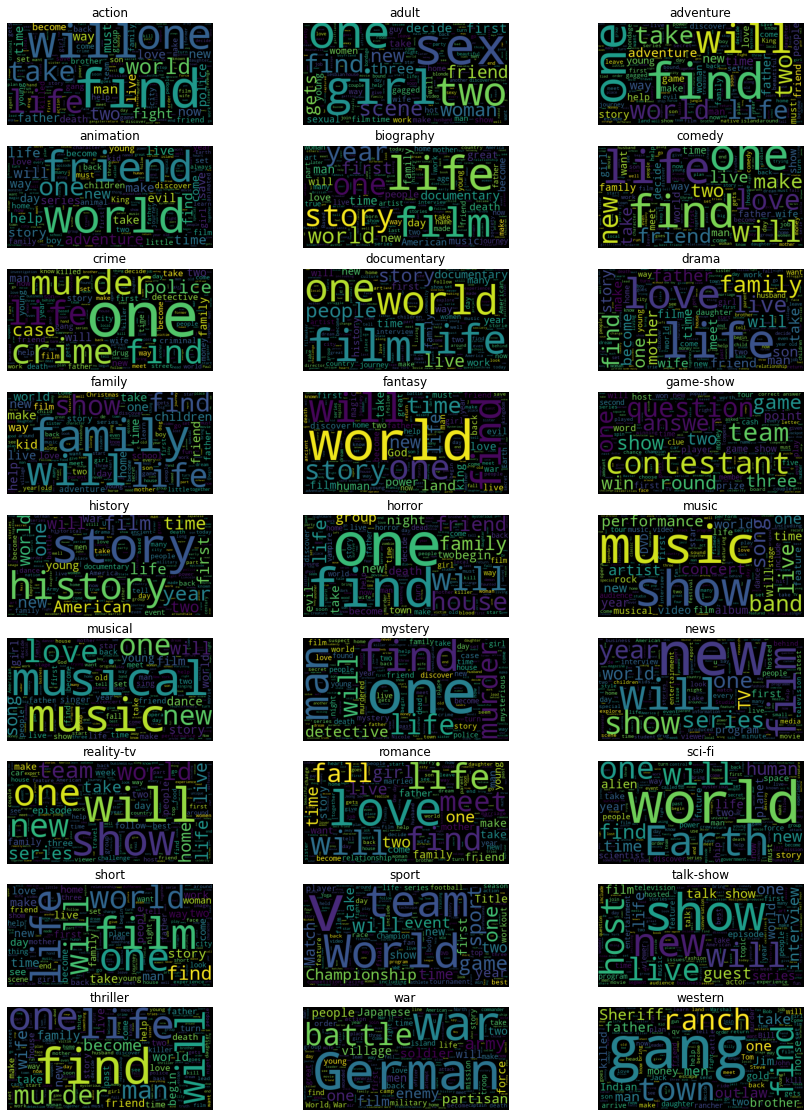

In [14]:
# plot a word cloud for each genre
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(9, 3, figsize=(15, 20))

idx = 0

for row in range(9):
    for col in range(3):
        genre = genres[idx]
        
        df_genre = df_train.query("genre == @genre")

        text = ' '.join(df_genre['description'])
        wordcloud = WordCloud().generate(text)
        axes[row, col].imshow(wordcloud)
        axes[row, col].set_title(f'{genre}')
        axes[row, col].axis('off')

        idx += 1

While there are _stop words_ (which we should remove), we can clearly see that there is a **subset of specific words** related to each _genre_.

We should repeat this analysis after **_text cleaning/preprocessing_**.

## 3. Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['description-pre'])
y_train = df_train['label']

X_test = tfidf.transform(df_test['description-pre'])
y_test = df_test['label']

In [16]:
X_train.shape, X_test.shape

((43371, 128428), (10843, 128428))

In [17]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 128428


The **vocabulary size has increased**, probably due to _remove punctuations_. <br/>
I belive that when _removing the punctuation_ of **compound words**, like `'well-known'`, a _new word_ has been created `'wellknown'`. However, the _corpus_ may also have the single words `'well'` and `'known'`, which will result in _three words_ to the corpus.

## 5. Train the models

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [19]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [20]:
target_names = df_train[['genre', 'label']].sort_values(by='label')['genre'].unique()
target_names

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western'], dtype=object)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

      action       0.58      0.86      0.69      1052
       adult       0.56      0.99      0.71       472
   adventure       0.62      0.95      0.75       620
   animation       0.66      0.98      0.79       398
   biography       0.52      1.00      0.69       212
      comedy       0.74      0.61      0.67      5957
       crime       0.44      0.99      0.61       404
 documentary       0.87      0.67      0.76     10477
       drama       0.83      0.50      0.62     10890
      family       0.49      0.94      0.64       627
     fantasy       0.57      1.00      0.73       258
   game-show       0.78      1.00      0.88       155
     history       0.43      1.00      0.60       194
      horror       0.75      0.89      0.81      1763
       music       0.49      0.98      0.66       585
     musical       0.54      1.00      0.70       222
     mystery       0.58      1.00      0.73       255
        news       0.60    

In [22]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.6894884956951165


In [23]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.9114121437099896


## 6. Evaluate the model on the Test Set

In [24]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      action       0.31      0.47      0.37       263
       adult       0.41      0.75      0.53       118
   adventure       0.24      0.32      0.27       155
   animation       0.20      0.28      0.23       100
   biography       0.01      0.02      0.02        53
      comedy       0.59      0.46      0.52      1490
       crime       0.15      0.32      0.21       101
 documentary       0.78      0.61      0.69      2619
       drama       0.69      0.41      0.51      2723
      family       0.17      0.32      0.22       157
     fantasy       0.12      0.18      0.15        65
   game-show       0.74      0.67      0.70        39
     history       0.11      0.24      0.16        49
      horror       0.56      0.71      0.63       441
       music       0.37      0.82      0.51       146
     musical       0.15      0.24      0.18        55
     mystery       0.10      0.12      0.11        64
        news       0.18    

In [26]:
from sklearn.metrics import f1_score

f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'F1 Test: {f1_test}')

F1 Test: 0.36445595694107025


<br/>

The resulting **F1 score** has not improved after considering _text preprocessing_, at least for _Logistic Regression_.